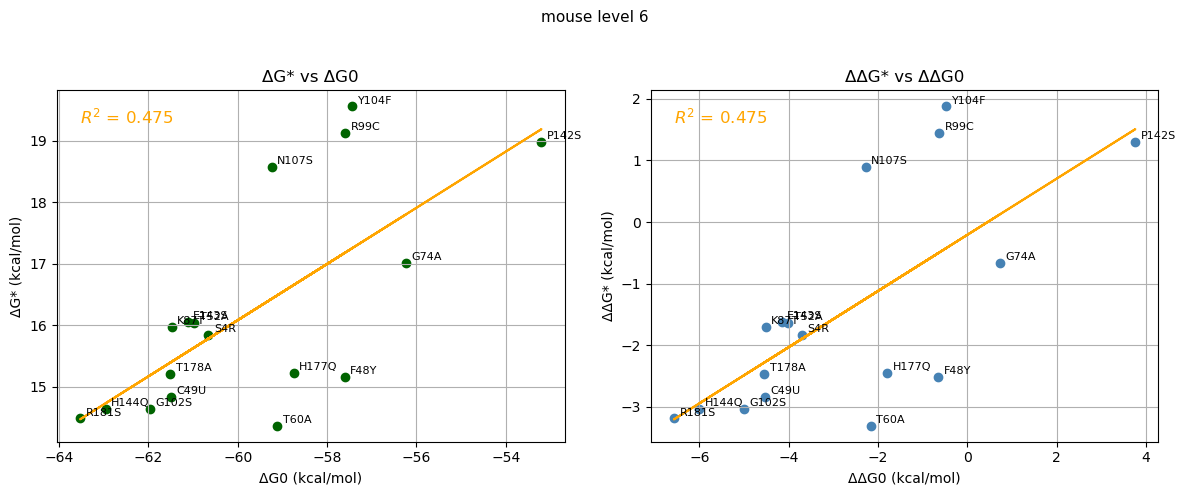

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# WT values
wt_dg_star = 17.68
wt_dg0 = -56.96

# Mutant data
sorted_data = [
    {"name": "C49U",   "mutation": "C49U",   "dg_star": 14.84, "dg0": -61.50, "sec49_distance": 0.0,   "ca_distance": 5.47},
    {"name": "F48Y",   "mutation": "F48Y",   "dg_star": 14.44, "dg0": -62.46, "sec49_distance": 3.88,  "ca_distance": 4.60},
    {"name": "T52A",   "mutation": "T52A",   "dg_star": 15.05, "dg0": -60.46, "sec49_distance": 5.20,  "ca_distance": 9.62},
    {"name": "R99C",   "mutation": "R99C",   "dg_star": 14.27, "dg0": -61.91, "sec49_distance": 9.50,  "ca_distance": 10.99},
    {"name": "H177Q",  "mutation": "H177Q",  "dg_star": 15.52, "dg0": -56.96, "sec49_distance": 14.00, "ca_distance": 15.71},
    {"name": "H144Q",  "mutation": "H144Q",  "dg_star": 13.46, "dg0": -63.09, "sec49_distance": 12.50, "ca_distance": 9.46},
    {"name": "T178A",  "mutation": "T178A",  "dg_star": 14.65, "dg0": -61.32, "sec49_distance": 14.77, "ca_distance": 18.99},
    {"name": "G74A",   "mutation": "G74A",   "dg_star": 12.98, "dg0": -62.57, "sec49_distance": 14.29, "ca_distance": 21.53},
    {"name": "E143S",  "mutation": "E143S",  "dg_star": 19.17, "dg0": -55.90, "sec49_distance": 15.00, "ca_distance": 12.97},
    {"name": "K87T",   "mutation": "K87T",   "dg_star": 18.43, "dg0": -55.73, "sec49_distance": 16.44, "ca_distance": 12.51},
    {"name": "P142S",  "mutation": "P142S",  "dg_star": 18.37, "dg0": -58.76, "sec49_distance": 15.50, "ca_distance": 14.77},
    {"name": "G102S",  "mutation": "G102S",  "dg_star": 17.74, "dg0": -59.50, "sec49_distance": 16.77, "ca_distance": 19.14},
    {"name": "Y104F",  "mutation": "Y104F",  "dg_star": 19.56, "dg0": -57.44, "sec49_distance": 16.50, "ca_distance": 18.27},
    {"name": "R181S",  "mutation": "R181S",  "dg_star": 13.81, "dg0": -62.22, "sec49_distance": 20.00, "ca_distance": 23.95},
    {"name": "S4R",    "mutation": "S4R",    "dg_star": 15.50, "dg0": -60.91, "sec49_distance": 19.64, "ca_distance": 22.97},
    {"name": "N107S",  "mutation": "N107S",  "dg_star": 13.08, "dg0": -63.27, "sec49_distance": 20.00, "ca_distance": 21.53},
]




# Extract values
dg0 = [m["dg0"] for m in mutants]
dg_star = [m["dg_star"] for m in mutants]
labels = [m["name"] for m in mutants]

# ΔΔG and ΔΔG*
ddg = [dg - wt_dg0 for dg in dg0]
ddg_star = [dg - wt_dg_star for dg in dg_star]

plt.figure(figsize=(12, 5))

# Plot 1: ΔG* vs ΔG0 with fit line and R²
plt.subplot(1, 2, 1)
plt.scatter(dg0, dg_star, color='darkgreen')
slope, intercept, r_value, p_value, std_err = linregress(dg0, dg_star)
plt.plot(dg0, [slope*x + intercept for x in dg0], color='orange')
for i, label in enumerate(labels):
    plt.annotate(label, (dg0[i], dg_star[i]), fontsize=8, xytext=(4, 2), textcoords='offset points')
plt.xlabel("ΔG0 (kcal/mol)")
plt.ylabel("ΔG* (kcal/mol)")
plt.title("ΔG* vs ΔG0")
plt.grid(True)
plt.text(min(dg0), max(dg_star), f'$R^2$ = {r_value**2:.3f}', color='orange', fontsize=12, verticalalignment='top')

# Plot 2: ΔΔG* vs ΔΔG with fit line and R²
plt.subplot(1, 2, 2)
plt.scatter(ddg, ddg_star, color='steelblue')
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(ddg, ddg_star)
plt.plot(ddg, [slope2*x + intercept2 for x in ddg], color='orange')
for i, label in enumerate(labels):
    plt.annotate(label, (ddg[i], ddg_star[i]), fontsize=8, xytext=(4, 2), textcoords='offset points')
plt.xlabel("ΔΔG0 (kcal/mol)")
plt.ylabel("ΔΔG* (kcal/mol)")
plt.title("ΔΔG* vs ΔΔG0")
plt.grid(True)
plt.text(min(ddg), max(ddg_star), f'$R^2$ = {r_value2**2:.3f}', color='orange', fontsize=12, verticalalignment='top')

plt.suptitle("mouse level 6", fontsize=11)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
save_path = "/home/hp/nayanika/github/GPX6/figures"
os.makedirs(save_path, exist_ok=True)
plt.savefig(f"{save_path}/level6mouse.png", dpi=300)

plt.show()
